In [1]:
!pip install -q diffusers accelerate torch torchvision fastapi uvicorn pyngrok nest_asyncio


In [2]:
from huggingface_hub import notebook_login
notebook_login()


In [3]:
from diffusers import DDPMPipeline
import torch

MODEL_ID = "MehfuzAlam/ddpm-butterflies-128"

pipe = DDPMPipeline.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")
pipe.set_progress_bar_config(disable=True)

print("✅ Model loaded successfully")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/497 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

✅ Model loaded successfully


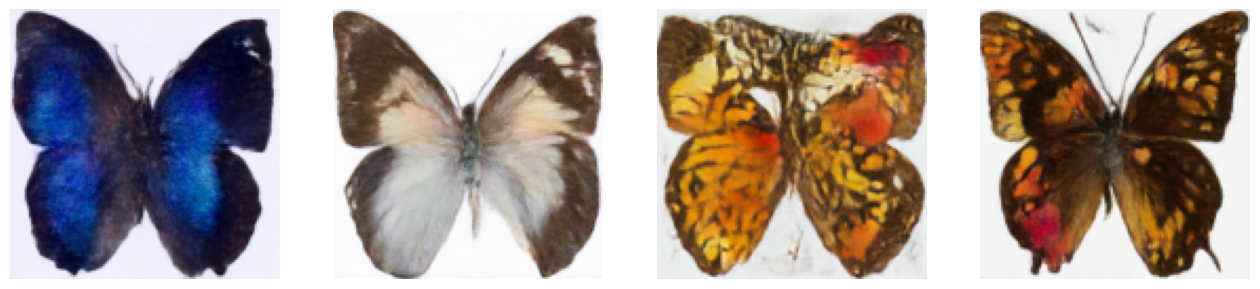

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

images = pipe(batch_size=4).images

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis("off")
plt.show()


In [5]:
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from io import BytesIO
import base64
import nest_asyncio




In [ ]:
# class GenerateRequest(BaseModel):
#     num_images: int = 1


In [10]:
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from io import BytesIO
import base64
import uvicorn
import nest_asyncio


app = FastAPI(title="AI Nexus DDPM API")

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

class TextPrompt(BaseModel):
    text: str   # kept only for frontend compatibility

@app.post("/generate")
async def generate_image(prompt: TextPrompt):
    try:
        # DDPM is unconditional (ignores text)
        image = pipe(batch_size=1).images[0]

        buffered = BytesIO()
        image.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        return {"image": img_str}

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


In [11]:
!pip install -q pyngrok


In [12]:
from pyngrok import ngrok
import getpass


API_KEY = getpass.getpass("Enter your ngrok API key: ")
print("API key loaded safely!")


Enter your ngrok API key: ··········
API key loaded safely!


In [ ]:
print("Setting up ngrok...")
ngrok.set_auth_token(API_KEY)
public_url = ngrok.connect(8000)
print("Public URL:", public_url.public_url)

print("Starting server...")
nest_asyncio.apply()

config = uvicorn.Config(app, host="0.0.0.0", port=8000, loop="asyncio")
server = uvicorn.Server(config)

await server.serve()

Setting up ngrok...
Public URL: https://subtrochanteric-unbelieving-lien.ngrok-free.dev
Starting server...


INFO:     Started server process [1325]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     2405:acc0:1204:7019:8906:492f:eb93:7d3:0 - "OPTIONS /generate HTTP/1.1" 200 OK
INFO:     2405:acc0:1204:7019:8906:492f:eb93:7d3:0 - "POST /generate HTTP/1.1" 200 OK
